<a href="https://colab.research.google.com/github/AftabUdaipurwala/Deeplearning/blob/main/Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import pandas as pd
import numpy as np
from sklearn import linear_model
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/py-master/DeepLearningML/16_cnn_cifar10_small_image_classification/'

cnn_cifar10_dataset.ipynb	   digits_nn.jpg
cnn_mnist_exercise_solution.ipynb  small_images.jpg


In [4]:
(xtrain, ytrain), (xtest, ytest) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
xtrain.shape

(50000, 32, 32, 3)

In [6]:
xtest.shape

(10000, 32, 32, 3)

In [7]:
ytrain.shape

(50000, 1)

In [8]:
ytrain[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
ytrain = ytrain.reshape(-1,)
ytrain[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
ytest = ytest.reshape(-1,)
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [11]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])


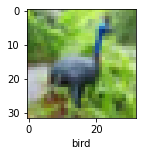

In [13]:
plot_sample(xtrain,ytrain,6)

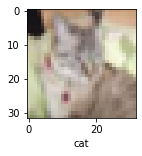

In [14]:
plot_sample(xtest,ytest,8)

In [15]:
xtrain = xtrain/255
xtest = xtest/255

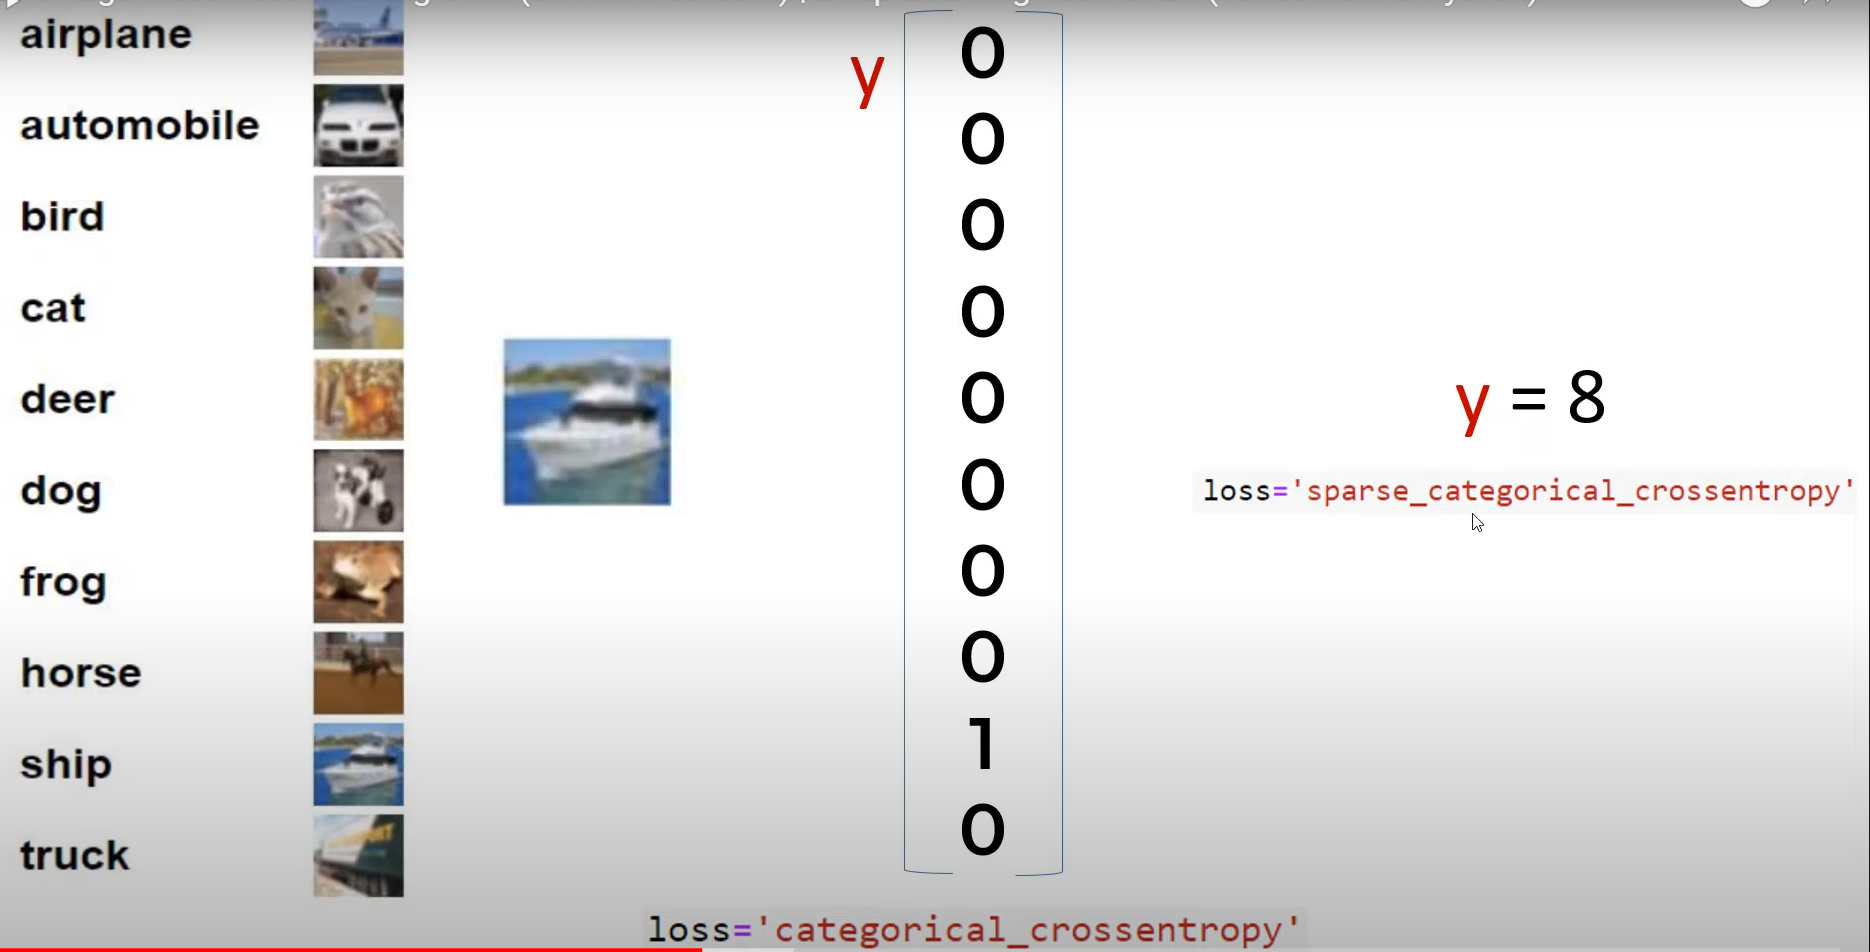

In [16]:
ann = models.Sequential([
                         layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(3000, activation='relu'),
                         layers.Dense(1000, activation='relu'),
                         layers.Dense(10, activation='sigmoid'),
])

ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])
ann.fit(xtrain,ytrain, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.8114 - accuracy: 0.3542
Epoch 2/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.6201 - accuracy: 0.4290
Epoch 3/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.5387 - accuracy: 0.4591
Epoch 4/5
1563/1563 [==============================] - 98s 62ms/step - loss: 1.4790 - accuracy: 0.4808
Epoch 5/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4294 - accuracy: 0.4956


In [17]:
ann.evaluate(xtest,ytest)

313/313 [==============================] - 8s 24ms/step - loss: 1.4396 - accuracy: 0.4901


[1.4395753145217896, 0.4900999963283539]

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
ypred = ann.predict(xtest)
ypred_classes = [np.argmax(element) for element in ypred]
print(classification_report(ytest, ypred_classes))

              precision    recall  f1-score   support

           0       0.61      0.52      0.56      1000
           1       0.59      0.60      0.59      1000
           2       0.35      0.43      0.39      1000
           3       0.32      0.45      0.37      1000
           4       0.48      0.35      0.41      1000
           5       0.44      0.32      0.37      1000
           6       0.53      0.50      0.52      1000
           7       0.64      0.47      0.54      1000
           8       0.66      0.58      0.62      1000
           9       0.46      0.68      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.49     10000
weighted avg       0.51      0.49      0.49     10000



In [19]:
cnn = models.Sequential([
                         #CNN
                         layers.Conv2D(filters=32,kernel_size=(3,3),activation = 'relu', input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         layers.Conv2D(filters=64,kernel_size=(3,3),activation = 'relu', input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         # Dense layer
                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(10, activation='softmax'),
])

In [20]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])
cnn.fit(xtrain,ytrain, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5039 - accuracy: 0.4549
Epoch 2/5
1563/1563 [==============================] - 60s 39ms/step - loss: 1.1280 - accuracy: 0.6031
Epoch 3/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0018 - accuracy: 0.6486
Epoch 4/5
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9194 - accuracy: 0.6791
Epoch 5/5
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8574 - accuracy: 0.7039


In [21]:
cnn.evaluate(xtest,ytest)

313/313 [==============================] - 4s 12ms/step - loss: 0.9524 - accuracy: 0.6692


[0.9523889422416687, 0.6692000031471252]

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
ypred = cnn.predict(xtest)
ypred_classes = [np.argmax(element) for element in ypred]
print(classification_report(ytest, ypred_classes))

              precision    recall  f1-score   support

           0       0.67      0.76      0.72      1000
           1       0.64      0.89      0.75      1000
           2       0.51      0.63      0.57      1000
           3       0.56      0.46      0.51      1000
           4       0.66      0.58      0.62      1000
           5       0.61      0.55      0.58      1000
           6       0.80      0.70      0.75      1000
           7       0.69      0.77      0.72      1000
           8       0.83      0.71      0.77      1000
           9       0.79      0.63      0.70      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



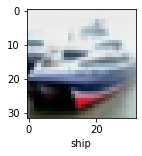

In [23]:
plot_sample(xtest, ytest,1)

In [24]:
ypred = cnn.predict(xtest)

In [25]:
yclasses = [np.argmax(element) for element in ypred]
yclasses[:5]

[3, 8, 8, 0, 4]

In [26]:
classes[yclasses[1]]

'ship'

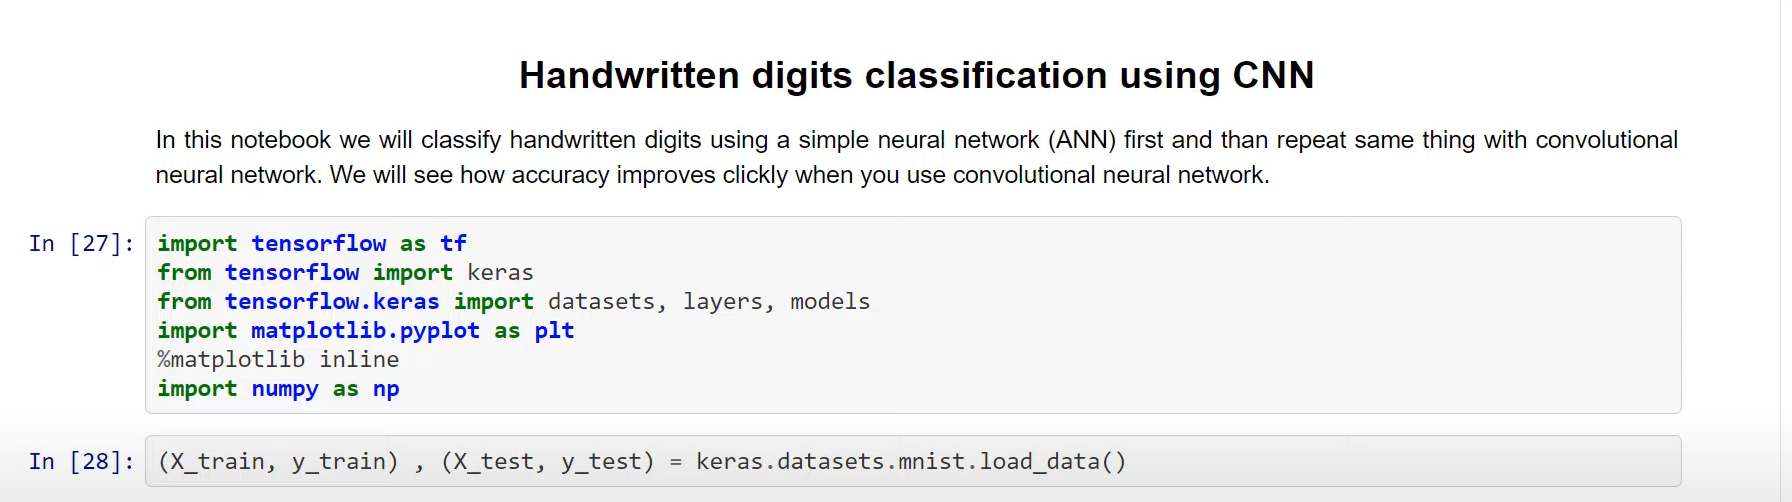

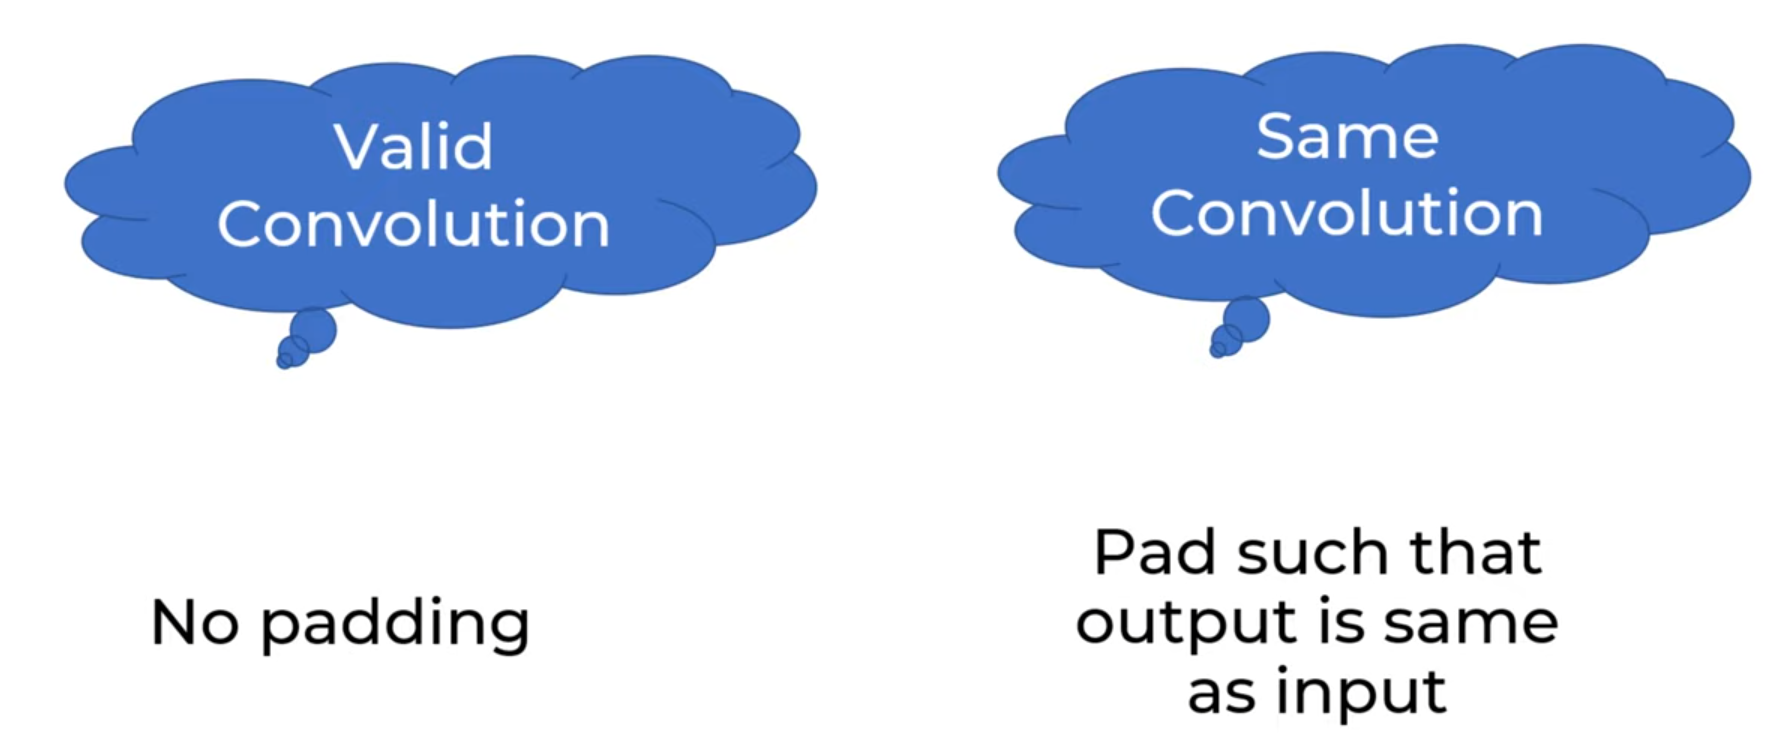

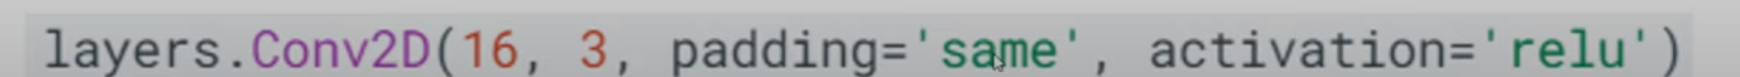